In [37]:
%matplotlib inline

In [38]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np


In [39]:
def align(img, g_coord):
    row_g, col_g = g_coord

    img_f = img_as_float(img)
    height = img_f.shape[0] // 3
    width = img_f.shape[1]

    b = img_f[:height, :]
    g = img_f[height:height*2, :]
    r = img_f[height*2:height*3, :]

    # считаем сдвиги каналов
    border_width = int(width * 0.07)
    border_height = int(height * 0.07)

    r = r[border_height:1-border_height, border_width:1-border_width]
    g = g[border_height:1-border_height, border_width:1-border_width]
    b = b[border_height:1-border_height, border_width:1-border_width]

    corr_rg_max = -1
    ri = 0
    rj = 0
    for i in range(-15, 16):
        for j in range(-15, 16):
            corr = (np.roll(np.roll(r, i, axis=0), j, axis=1) * g).sum()
            if corr > corr_rg_max:
                corr_rg_max = corr
                ri = i
                rj = j

    corr_bg_max = -1
    bi = 0
    bj = 0
    for i in range(-15, 16):
        for j in range(-15, 16):
            corr = (np.roll(np.roll(b, i, axis=0), j, axis=1) * g).sum()
            if corr > corr_bg_max:
                corr_bg_max = corr
                bi = i
                bj = j

    # сдвигаем точку на зеленом канале
    # на другие каналы
    return (row_g - height - bi, col_g - bj), (row_g + height - ri, col_g - rj)


In [40]:
img = imread("https://stepik.org/media/attachments/lesson/58182/00.png")

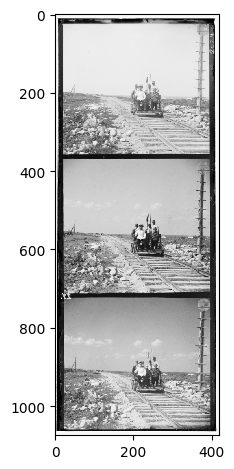

In [41]:
imshow(img)

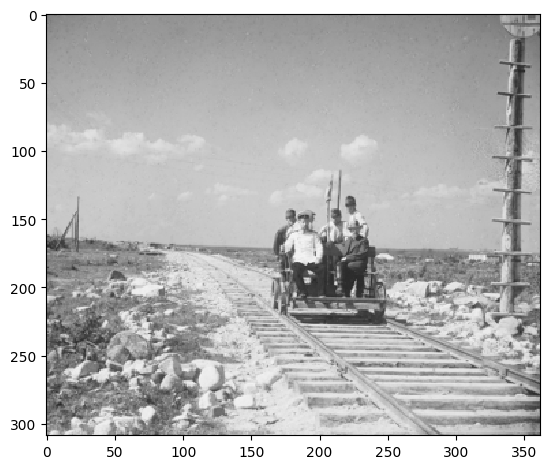

In [42]:
align(img, (0,0))